<a href="https://colab.research.google.com/github/Akkijd/DataScience-projects/blob/main/Exploratory%20Data%20Analysis-%20Mercari%20Case%20Study/Mercari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mercari Case Study**

Mercari is Japan's biggest community powered shopping app where people can sell and buy a variety of brand new and used products of different brands, from sweaters to smartphones. Now Mercari would like to suggest the correct prices to the sellers but this is tough because their sellers are enabled to put just about anything, or any bundle of things on Mercari's marketplace. So our objective is to build a model that automatically suggests the right product prices to the sellers. We are provided of the following information for each product:

train_id - the id of the product

name - the title of the product

item_condition_id - the condition of the product provided by the sellers

category_name - category of the product

brand_name - the product's brand name

shipping - 1 if shipping fee is paid by seller and 0 if shipping fee is paid by buyer

item_description - the full description of the product

price - the price that the product was sold for (This is the target variable that we will predict)

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/train.tsv', sep='\t')
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [ ]:
data.shape

(1482535, 8)

In [ ]:
[{x : data[x].isnull().sum()} for x in data.columns]

[{'train_id': 0},
 {'name': 0},
 {'item_condition_id': 0},
 {'category_name': 6327},
 {'brand_name': 632682},
 {'price': 0},
 {'shipping': 0},
 {'item_description': 4}]

In [ ]:
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
brand_name,632682,42.7
category_name,6327,0.4
item_description,4,0.0


In [ ]:
(data.item_description == 'No description yet').sum()

82489

In [ ]:
data.brand_name[data.brand_name.isnull()] = "unBranded"
data = data.loc[~data.category_name.isnull(),:]
data.item_description[data.item_description.isnull()] = "No description yet"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476208 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1476208 non-null  int64  
 1   name               1476208 non-null  object 
 2   item_condition_id  1476208 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         1476208 non-null  object 
 5   price              1476208 non-null  float64
 6   shipping           1476208 non-null  int64  
 7   item_description   1476208 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 101.4+ MB


In [ ]:
data.item_description[0]

'No description yet'

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 5.1 MB/s 
     |████████████████████████████████| 675 kB 52.9 MB/s 
     |████████████████████████████████| 58 kB 6.8 MB/s 
     |████████████████████████████████| 3.1 MB 36.7 MB/s 
     |████████████████████████████████| 812 kB 48.9 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=4d985771d4c724105527133395dac212bed9210d97ab4363be533a7cd4a23e84
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=5e93a6ba112e7b7171c766f6c3f06dff6d1fe0706a1ff0023ee63138ceb9507b
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data split**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, shuffle=False)
print(train.shape, test.shape)
print((train.shipping.sum()/train.shape[0]), (test.shipping.sum()/test.shape[0]))

(1180966, 8) (295242, 8)
0.44769790154839345 0.44734827700665897


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, stratify = ['category_name'])
print(train.shape, test.shape)
print((train.shipping.sum()/train.shape[0]), (test.shipping.sum()/test.shape[0]))

ValueError: ignored

Number of data points are small, categories are high 

# **Exploratory Data Anlysis**

In [ ]:
print('There are a total of',train.shape[0],'observations in the train data.')


There are a total of 1180966 observations in the train data.


## Price

In [ ]:
train['price'].describe()

count    1.180966e+06
mean     2.673110e+01
std      3.846491e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [ ]:
price = train['price'].values
price = np.sort(price, axis=None)
print('{}th percentile value is {}'.format(90, price[int(len(price)*(float(90)/100))]))

90th percentile value is 51.0


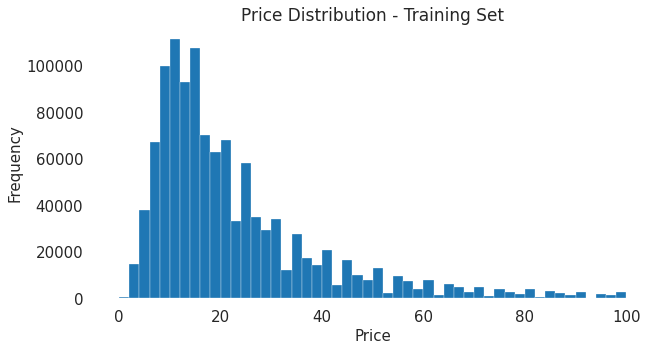

In [ ]:
train['price'].plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[0,100])
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)
plt.show()

Based on the the above statistics, the observations are as follows:

The median price of the items is 17 dollars.
Around 90% of the items have price around 51 dollars or below.
The Price distribution of the items is heavily skewed to the right.

# Shipping

In [ ]:
train['shipping'].value_counts(normalize=True)*100

0    55.274918
1    44.725082
Name: shipping, dtype: float64

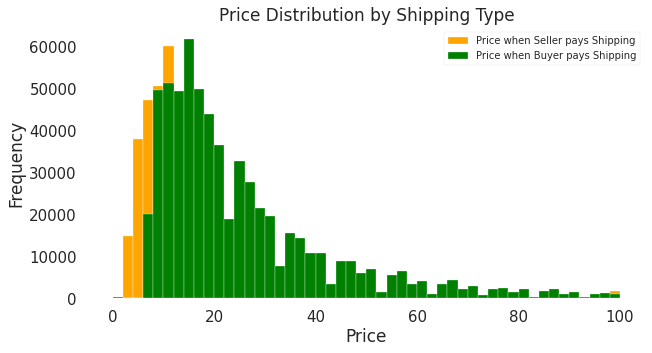

In [ ]:
shipping_fee_by_seller = train.loc[train.shipping==1, 'price']
shipping_fee_by_buyer = train.loc[train.shipping==0, 'price']

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(shipping_fee_by_seller, color='Orange', alpha=1.0, bins=50, range=[0,100], label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='Green', alpha=1.0, bins=50, range=[0,100], label='Price when Buyer pays Shipping')
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('Price', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.title('Price Distribution by Shipping Type', fontsize=17)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

In [ ]:
print('The median price is ${}'.format(round(shipping_fee_by_seller.median(), 2)), 'if seller pays shipping')
print('The median price is ${}'.format(round(shipping_fee_by_buyer.median(), 2)), 'if buyer pays shipping')

The median price is $14.0 if seller pays shipping
The median price is $20.0 if buyer pays shipping


Some observations are as follows:-

The shipping fee for 55% of the items are paid by the buyers.
Normally when we buy products online, we need to pay for shipping or delivery for products which are below a certain price. But here the trend is kind of opposite since the median price of items for which the seller pays the shipping fees is lower than the median price of the items for which the buyer pays the shipping fees.

## Item Condition

The 'item_condition_id' has five unique values ranging from 1 to 5. Lower the number, better the condition of the item.



In [ ]:
train['item_condition_id'].value_counts(normalize=True, sort=False)*100

1    43.228001
2    25.283793
3    29.174168
4     2.151882
5     0.162155
Name: item_condition_id, dtype: float64

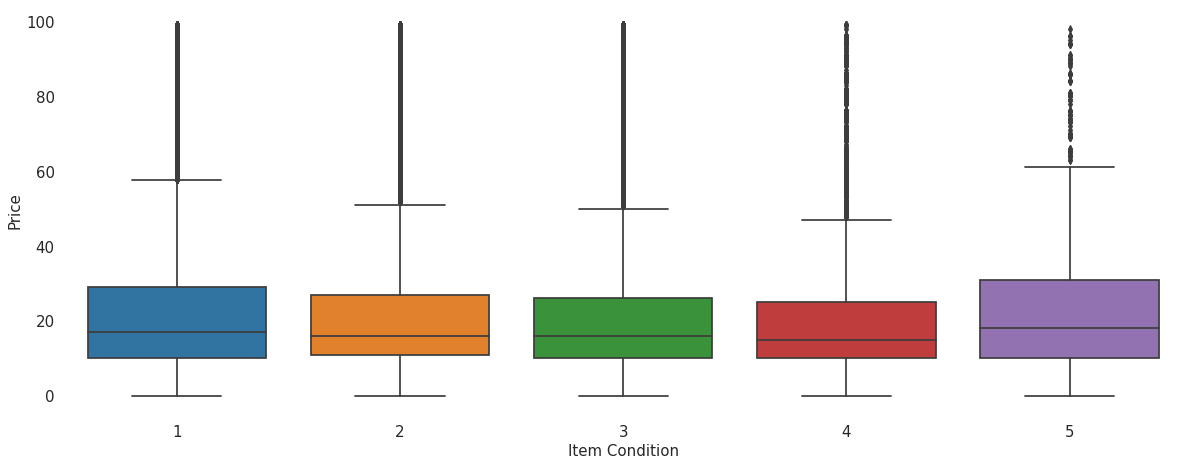

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='item_condition_id', y='price', data=price_100, ax=ax)
plt.xlabel('Item Condition', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
train[['item_condition_id','price']].groupby('item_condition_id').median()

,price
item_condition_id,
1,18.0
2,17.0
3,16.0
4,15.0
5,19.0


Some observations are as follows:

43% of the items have item condition ID as 1 while only 0.16% of the items have item condition ID has 5.
Interestingly, items with item condition ID as 5 have higher median price when compared with items having better condition.

In [ ]:

con = train[(train['item_condition_id']==5) & (train['price']>=20)]
con.head(6)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
964022,964022,Non working IPhone 6 Gold,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,72.0,0,"Water damaged iPhone 6s Gold, does not turn on..."
603092,603092,Xbox one(Read description),5,Electronics/Video Games & Consoles/Consoles,Xbox,39.0,0,Broken Xbox one If you know how to open the di...
433119,433119,Apple iPhone 5c - 16GB - Blue,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,27.0,0,Item Description This item has a cracked scree...
1284995,1284995,14K Gold Herringbone Bracelet 14KT,5,Women/Jewelry/Bracelets,NaN,69.0,0,"7.5"" 3.8 Grams - 14K gold is [rm] a gram so th..."
1246125,1246125,Iphone 6 for parts,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,34.0,0,My brother dropped his phone and now for some ...
804387,804387,Broken PS4 with controller,5,Electronics/Video Games & Consoles/Games,Sony,94.0,0,It started randomly shutting off during gamepl...


# Category Name

In [ ]:
len(train.category_name.unique())

1268

In [ ]:
categories = []
for val in list(train.category_name):
  try:  
    categories += (val.split('/'))[0]
  except:
    categories.append('')

In [ ]:
(train['category_name'].value_counts(normalize=True)*100).head(15)

Women/Athletic Apparel/Pants, Tights, Leggings                 4.060405
Women/Tops & Blouses/T-Shirts                                  3.134891
Beauty/Makeup/Face                                             2.321659
Beauty/Makeup/Lips                                             2.025461
Electronics/Video Games & Consoles/Games                       1.798020
Beauty/Makeup/Eyes                                             1.720456
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    1.675493
Women/Underwear/Bras                                           1.439330
Women/Tops & Blouses/Tank, Cami                                1.381496
Women/Tops & Blouses/Blouse                                    1.374299
Women/Dresses/Above Knee, Mini                                 1.356940
Women/Jewelry/Necklaces                                        1.348557
Women/Athletic Apparel/Shorts                                  1.328404
Beauty/Makeup/Makeup Palettes                                  1

As a pre-processing step, all textual categories are converted to the lower case. 

In [ ]:
print("There are %d unique main categories." % train['category_name'].nunique())

There are 1264 unique main categories.


In [ ]:
def split_cat(text):
    try: return text.split("/")
    except: return ("Category Unknown", "Category Unknown", "Category Unknown")
    
train['main_cat'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))
test['main_cat'], test['subcat_1'], test['subcat_2'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unBranded,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unBranded,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unBranded,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [ ]:
def lowercase_categorical_features_train(feature):
    original_list = list(train[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list
  
def lowercase_categorical_features_test(feature):
    original_list = list(test[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list

In [ ]:
train['subcat_1'] = lowercase_categorical_features_train('subcat_1')
train['subcat_2'] = lowercase_categorical_features_train('subcat_2')
train['main_cat'] = lowercase_categorical_features_train('main_cat')

test['subcat_1'] = lowercase_categorical_features_test('subcat_1')
test['subcat_2'] = lowercase_categorical_features_test('subcat_2')
test['main_cat'] = lowercase_categorical_features_test('main_cat')

In [ ]:
print("There are %d unique main categories." % train['main_cat'].nunique())
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())

There are 10 unique main categories.
There are 113 unique first sub-categories.
There are 862 unique second sub-categories.


In [ ]:
train['main_cat'].value_counts(normalize=True)*100

women                     44.997908
beauty                    14.095833
kids                      11.611427
electronics                8.301509
men                        6.338879
home                       4.615544
vintage & collectibles     3.151911
other                      3.078327
handmade                   2.092270
sports & outdoors          1.716391
Name: main_cat, dtype: float64

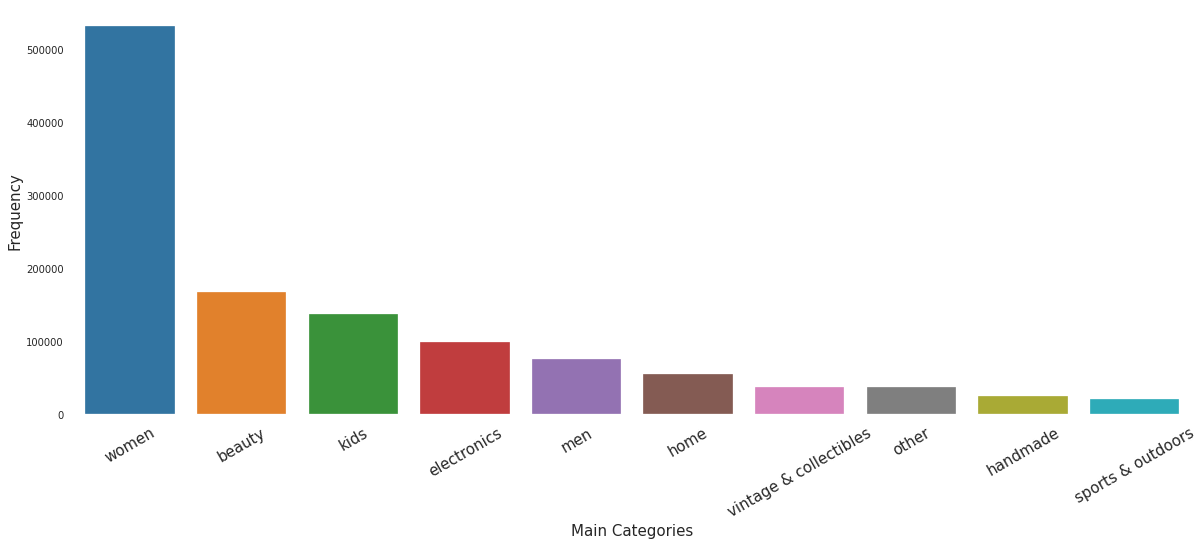

In [ ]:
fig, ax = plt.subplots(figsize=(20,7.5))
sns.countplot(train['main_cat'], ax=ax, order=(train['main_cat'].value_counts()).index)
plt.xlabel('Main Categories', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.show()

In [ ]:
main_cat = train.groupby('main_cat')
main_cat_median = pd.DataFrame(main_cat['price'].median())
main_cat_median = main_cat_median.sort_values(ascending=True, by='price')
main_cat_median

,price
main_cat,
handmade,12.0
kids,14.0
other,14.0
beauty,15.0
electronics,15.0
sports & outdoors,16.0
vintage & collectibles,16.0
home,18.0
women,19.0


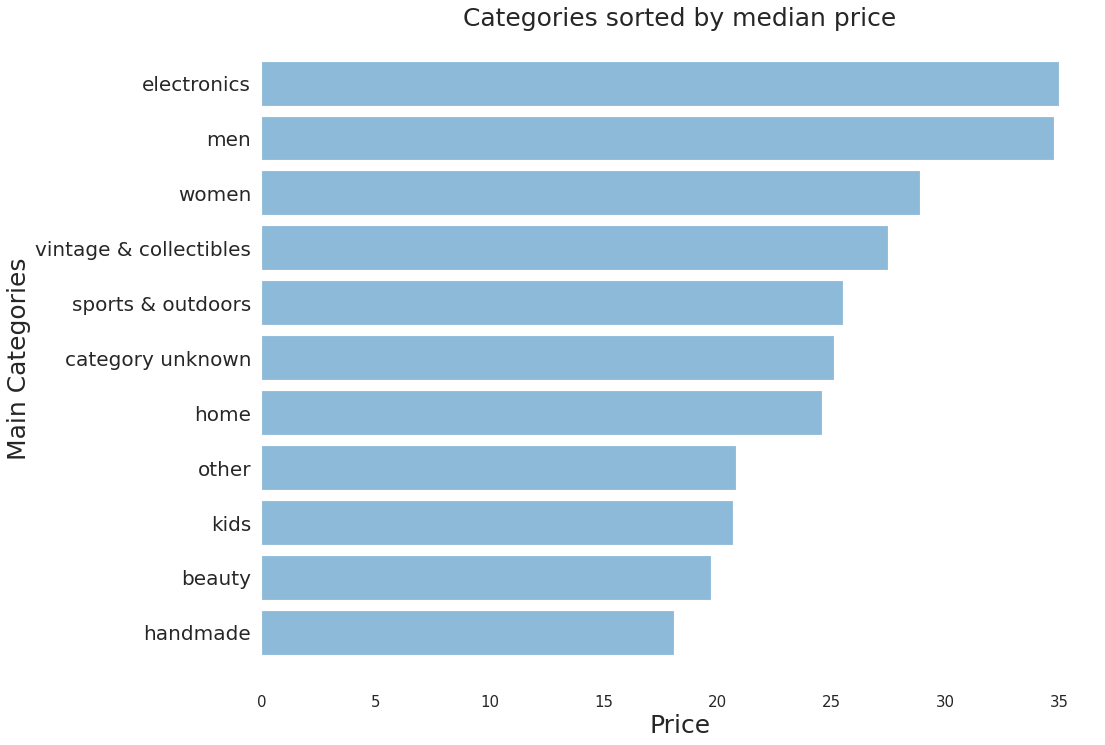

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(0,len(main_cat_median)), main_cat_median['price'], align='center', alpha=0.5)
plt.yticks(range(0,len(main_cat_median)), main_cat_median.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Categories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Main Categories', fontsize=25)
plt.show()


44.8% of the total products belong to 'Women' category followed by 'Beauty' category products which takes up around 14% of the total products while 1.7% of the products, being the minimum, belong to the 'Sports and Outdoor' category.

The items from 'Men' category have the highest median price of 21 dolars followed by the items from 'Women' category having a median price of 19 dollars while the items from 'Handmade' category has the lowest median price of 12 dollars.

We can conclude that the main category has a dependace on the price and will thus be included to out initial feature set.

# First Subcategory

In [ ]:
train['subcat_1'].value_counts(normalize=True).head(10)

athletic apparel             0.090365
makeup                       0.084174
tops & blouses               0.072360
shoes                        0.067897
jewelry                      0.041636
toys                         0.039148
cell phones & accessories    0.035879
women's handbags             0.030941
dresses                      0.030707
women's accessories          0.028584
Name: subcat_1, dtype: float64

In [ ]:
paper = train[train['subcat_1']=='paper goods']
paper.head(6)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
442,442,Bundle for lexi,1,Handmade/Paper Goods/Sticker,unBranded,7.0,1,these are handmade NEW AND IMPROVED STICKER MA...,handmade,paper goods,sticker
904,904,40 Thank you stickers,1,Handmade/Paper Goods/Sticker,unBranded,3.0,1,20 smiley face 20 heart stickers You will rece...,handmade,paper goods,sticker
1127,1127,Ohio state deer antler decal,1,Handmade/Paper Goods/Sticker,unBranded,7.0,0,Vinyl decal comes with high quality transfer t...,handmade,paper goods,sticker
1318,1318,10 Cricut Explore Pens,1,Handmade/Paper Goods/Scrapbooking,unBranded,21.0,0,10 Cricut Pens- 2 packages! For Cricut Explore...,handmade,paper goods,scrapbooking
1329,1329,Tumblr Stickers: read description,1,Handmade/Paper Goods/Sticker,unBranded,3.0,1,These are the stickers I have left besides the...,handmade,paper goods,sticker
1436,1436,Probably whiskey vinyl decal sticker,1,Handmade/Paper Goods/Sticker,unBranded,9.0,0,"The size is 3"" leave me a message on a color. ...",handmade,paper goods,sticker


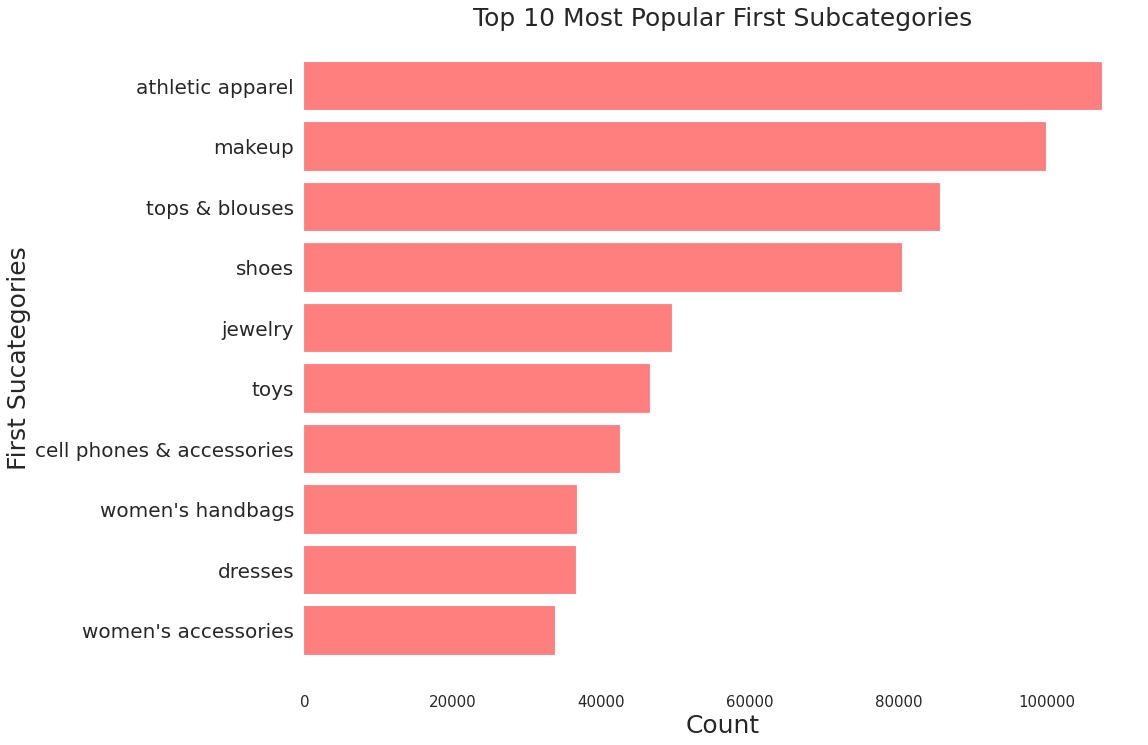

In [ ]:
x = train['subcat_1'].value_counts().index[:10]
y = train['subcat_1'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='red')
plt.yticks(range(len(x),0,-1), x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Most Popular First Subcategories', fontsize=25)
plt.xlabel('Count', fontsize=25)
plt.ylabel('First Sucategories', fontsize=25)
plt.show()

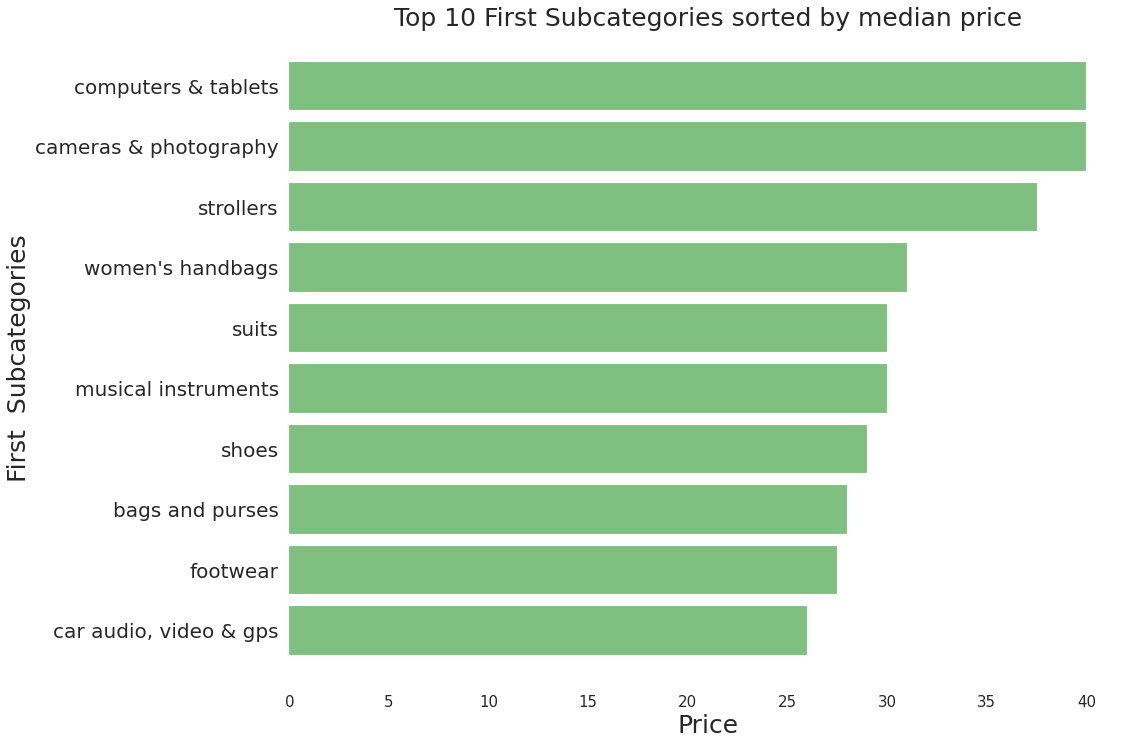

In [ ]:
subcat_1 = train.groupby('subcat_1')
subcat_1_median = pd.DataFrame(subcat_1['price'].median())
subcat_1_median = subcat_1_median.sort_values(ascending=True, by='price')
subcat_1_median_top = subcat_1_median[-10:]
subcat_1_median_bottom = subcat_1_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_1_median_top)), subcat_1_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_1_median_top)), subcat_1_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 First Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('First  Subcategories', fontsize=25)
plt.show()

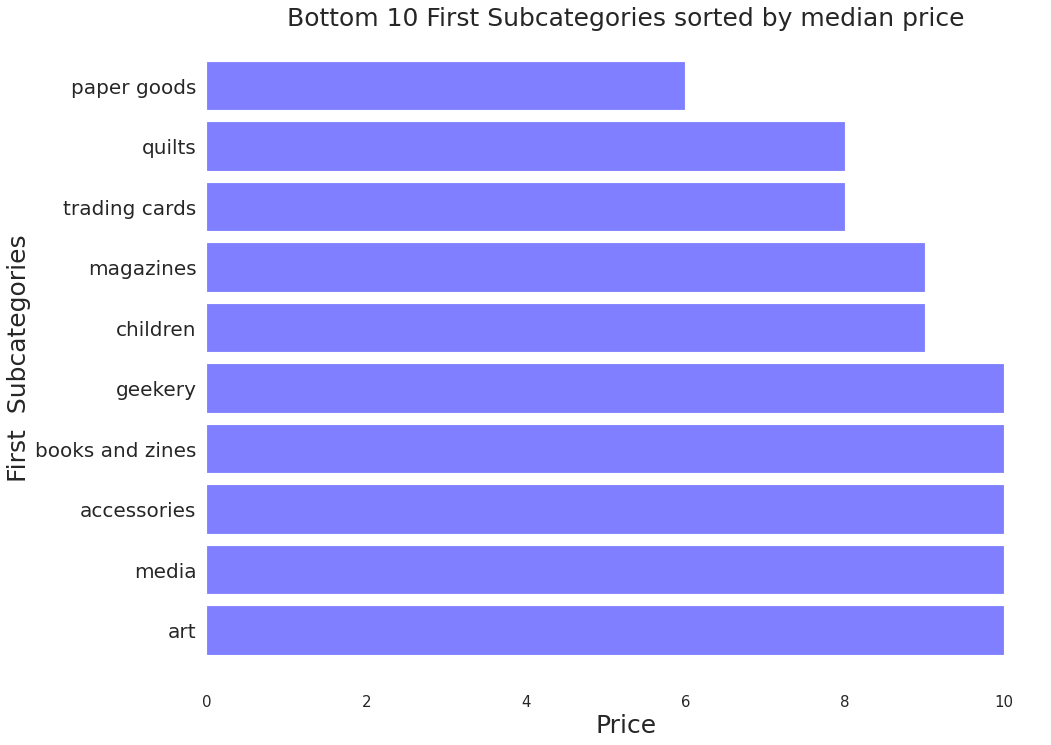

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom['price'], align='center', alpha=0.5, color='blue')
plt.yticks(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Bottom 10 First Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('First  Subcategories', fontsize=25)
plt.show()

In [ ]:
train.loc[train.main_cat == 'electronics',:].groupby('subcat_1').price.mean()

subcat_1
cameras & photography        71.695855
car audio, video & gps       38.213033
cell phones & accessories    29.742292
computers & tablets          87.548597
media                        14.610926
other                        36.138889
tv, audio & surveillance     43.910935
video games & consoles       31.907335
Name: price, dtype: float64


The most popular subcategory is 'Athletic Apparel' which aligns with the previous observation that the most popular main category is 'Women' and 'Athletic Apparel' comes under both the 'Women' and 'Men' categories. 9% of the total products comes under the Athletic Apparel category.

From the perspective of the median price of the items, the items from the subcategory of 'Computers & Tablets' have the highest median price, with the median price being 40 dollars.

The items from the subcategory 'Paper Goods' have the lowest median price of 6 dollars. 'Paper Goods' come under the 'Handmade' category. This also validates the previous observation that the items from 'Handmade' category have the lowest median price out of all the main categories.

In [ ]:
stand = train[train['subcat_2']=='Standard']
stand

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2


# Second Subcategory

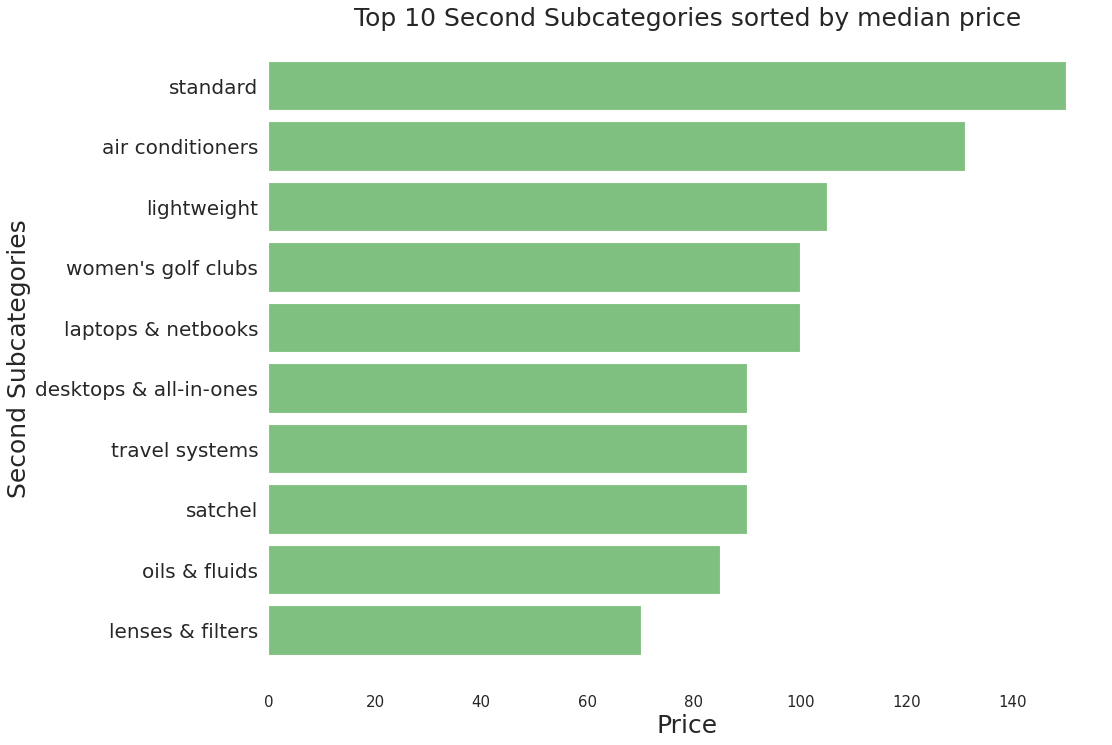

In [ ]:
subcat_2 = train.groupby('subcat_2')
subcat_2_median = pd.DataFrame(subcat_2['price'].median())
subcat_2_median = subcat_2_median.sort_values(ascending=True, by='price')
subcat_2_median_top = subcat_2_median[-10:]
subcat_2_median_bottom = subcat_2_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_2_median_top)), subcat_2_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_2_median_top)), subcat_2_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Second Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Second Subcategories', fontsize=25)
plt.show()

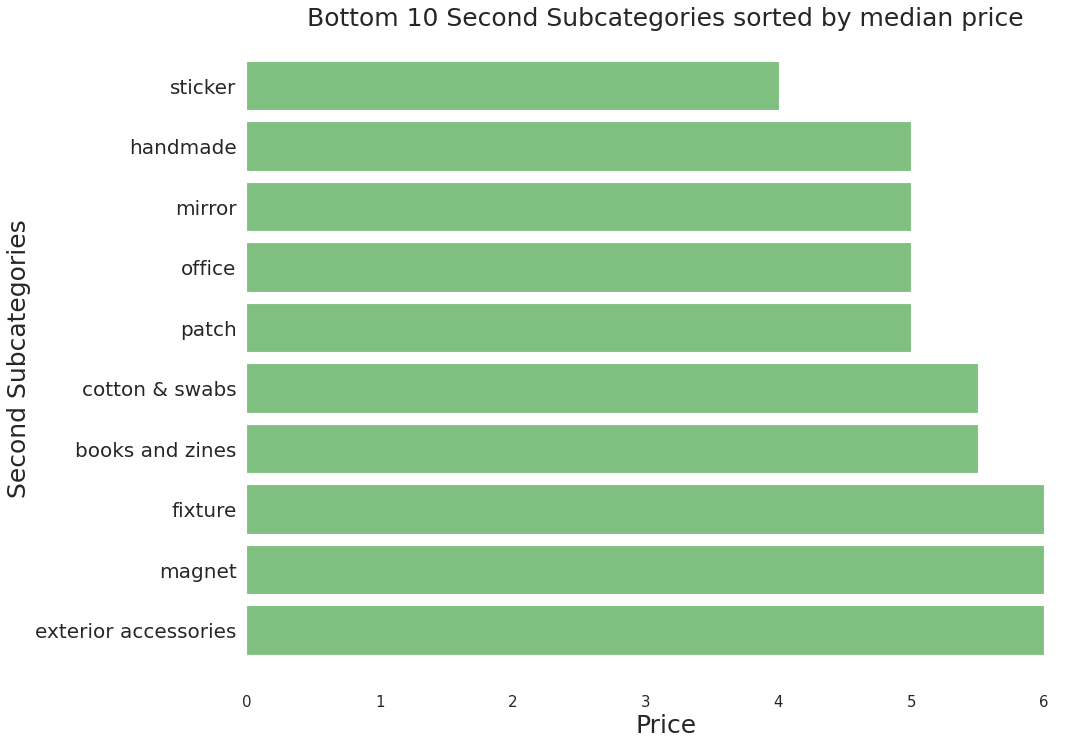

In [ ]:

plt.figure(figsize=(15,12))
plt.barh(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Bottom 10 Second Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Second Subcategories', fontsize=25)
plt.show()

# Brand

In [ ]:
(train['brand_name'].value_counts(normalize=True)*100).head(10)

PINK                 6.376628
Nike                 6.365160
Victoria's Secret    5.651042
LuLaRoe              3.641162
Apple                2.020172
FOREVER 21           1.786250
Nintendo             1.763607
Lululemon            1.694945
Michael Kors         1.634222
American Eagle       1.566736
Name: brand_name, dtype: float64

In [ ]:
print('There are', train['brand_name'].nunique(), 'unique brands in the data')

There are 4535 unique brands in the data


In [ ]:
train['brand_name'] = train['brand_name'].fillna('brand_unavailable')
brand = list(train['brand_name'].values)
brand_name_given = []
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
        
train['brand_name_given'] = brand_name_given   

test['brand_name'] = test['brand_name'].fillna('brand_unavailable')
brand = list(test['brand_name'].values)
brand_name_given = []
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
        
test['brand_name_given'] = brand_name_given

In [ ]:
train['brand_name'] = lowercase_categorical_features_train('brand_name')
test['brand_name'] = lowercase_categorical_features_test('brand_name')

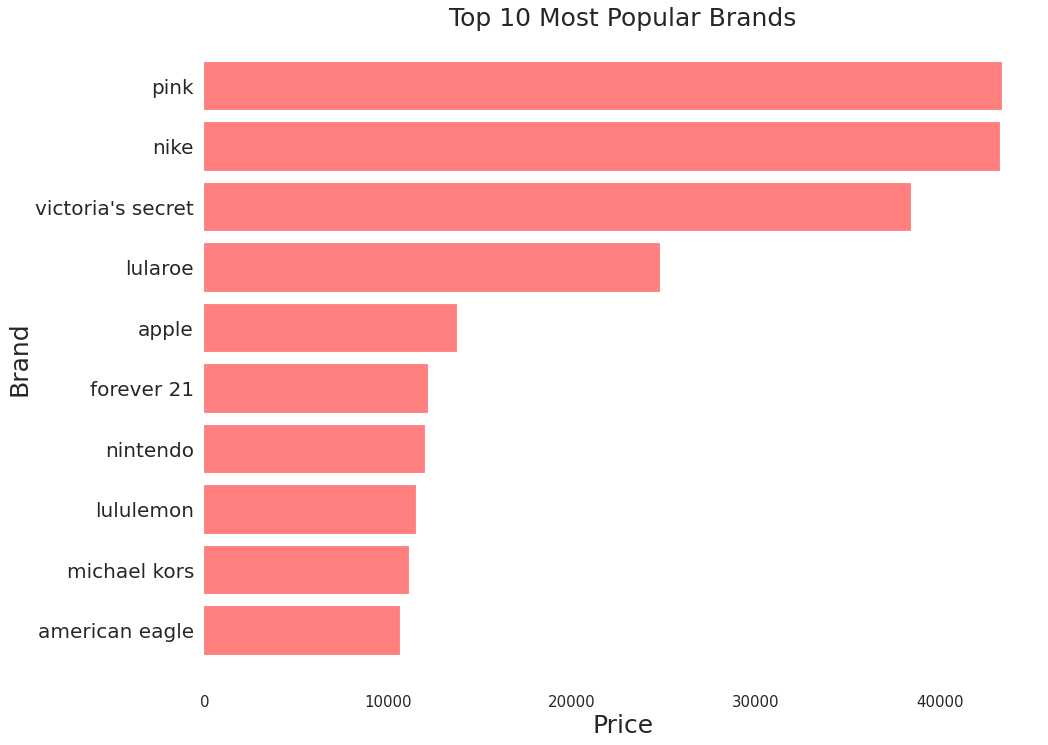

In [ ]:
brand_filled = train[train['brand_name']!='brand_unavailable']

x = brand_filled['brand_name'].value_counts().index[:10]
y = brand_filled['brand_name'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='red')
plt.yticks(range(len(x),0,-1), x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Most Popular Brands', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Brand', fontsize=25)
plt.show()


Nike and Pink are the top two most popular brands and 12.6% of the total products in the data belong to these two brands.

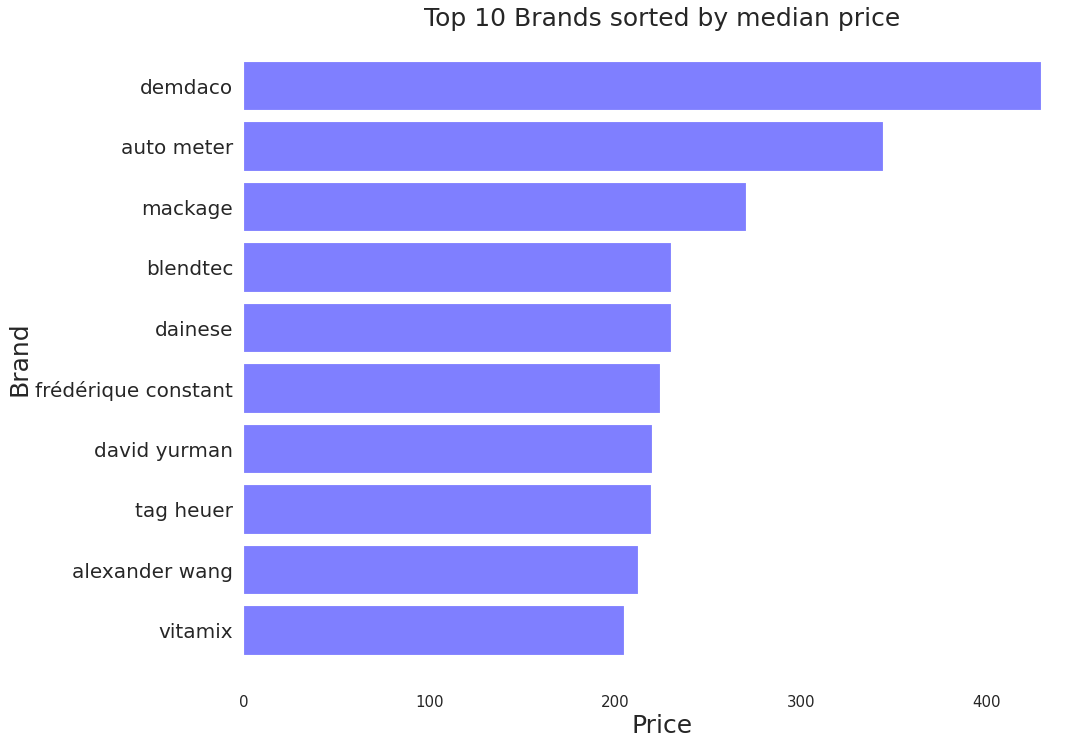

In [ ]:
brand = train.groupby('brand_name')
brand_median = pd.DataFrame(brand['price'].median())
brand_median = brand_median.sort_values(ascending=True, by='price')
brand_median_top = brand_median[-10:]
brand_median_bottom = brand_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(brand_median_top)), brand_median_top['price'], align='center', alpha=0.5, color='blue')
plt.yticks(range(0,len(brand_median_top)), brand_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Brands sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Brand', fontsize=25)
plt.show()

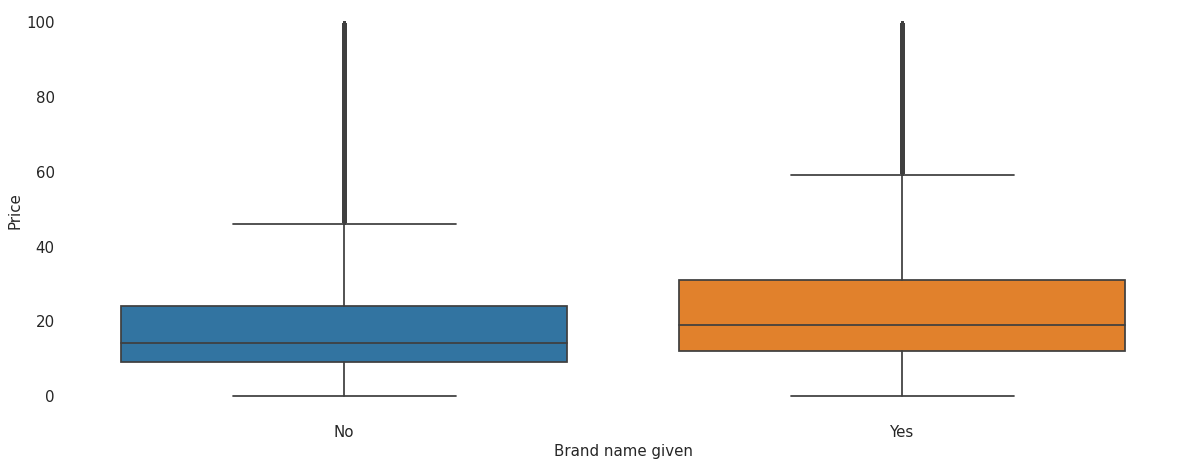

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='brand_name_given', y='price', data=price_100, ax=ax)
plt.xlabel('Brand name given', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
brand_given = train.groupby('brand_name_given')
brand_given_median = pd.DataFrame(brand_given['price'].describe())
brand_given_median

,count,mean,std,min,25%,50%,75%,max
brand_name_given,,,,,,,,
No,506272.0,21.108840,27.085329,0.0,9.0,14.0,24.0,1999.0
Yes,679756.0,30.905851,44.621451,0.0,12.0,20.0,34.0,2009.0


In [ ]:
train.groupby(['subcat_1','brand_name_given']).price.mean()

subcat_1             brand_name_given
accessories          No                  17.903549
                     Yes                 24.709236
antique              No                  24.699691
                     Yes                 18.666667
apparel              No                  15.102778
                                           ...    
women's accessories  No                  22.300057
                     Yes                 35.883044
women's handbags     No                  32.400231
                     Yes                 64.807843
woodworking          No                  22.535354
Name: price, Length: 219, dtype: float64

After looking at the box plots, although there is good amount of overlap, we can say that there is a considerable difference in the prices when the brand is given and when it's not given. The median price of the product when the brand name is given is 20 dollars and when the brand name is not given, the median price is 14$. In a nutshell, this feature will be helpful for the ML model to map some kind of pattern from it.

# Item Description

In [ ]:
item_description = list(train['item_description'].values)
description_availability = []
for i in item_description:
    if i=='No description yet':
        description_availability.append('No')
    else:
        description_availability.append('Yes')
        
train['description_given'] = description_availability      

item_description = list(test['item_description'].values)
description_availability = []
for i in item_description:
    if i=='No description yet':
        description_availability.append('No')
    else:
        description_availability.append('Yes')
        
test['description_given'] = description_availability

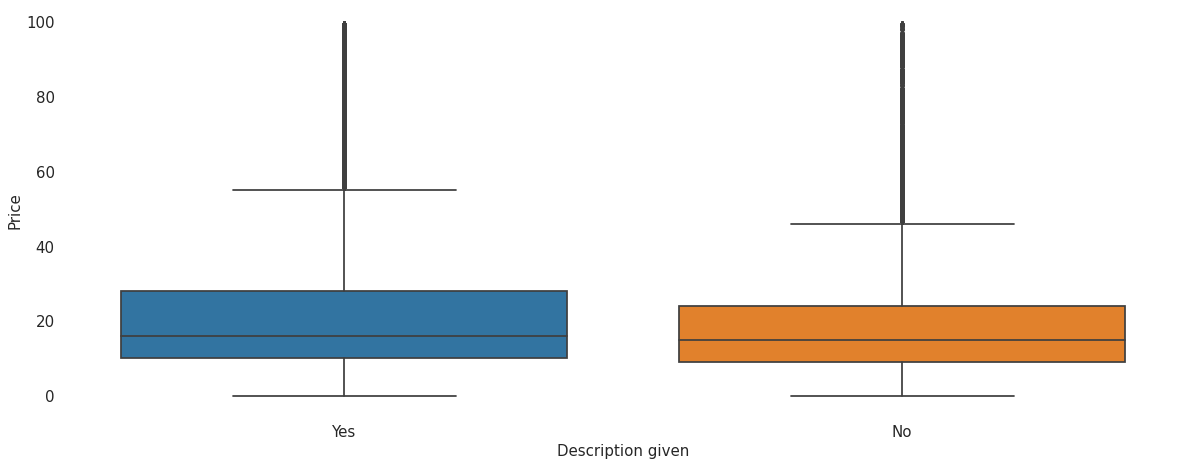

In [ ]:

price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='description_given', y='price', data=price_100, ax=ax)
plt.xlabel('Description given', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
desc_given = train.groupby('description_given')
desc_given_median = pd.DataFrame(desc_given['price'].describe())
desc_given_median

,count,mean,std,min,25%,50%,75%,max
description_given,,,,,,,,
No,66065.0,21.946409,29.950927,0.0,10.0,15.0,25.0,1506.0
Yes,1119963.0,27.005680,38.866737,0.0,10.0,17.0,30.0,2009.0


In [ ]:
train.groupby(['subcat_1','description_given']).price.mean()

subcat_1             description_given
accessories          No                   10.487903
                     Yes                  19.138744
antique              No                   17.177778
                     Yes                  25.061084
apparel              No                   14.949686
                                            ...    
women's accessories  Yes                  31.519901
women's handbags     No                   43.917647
                     Yes                  58.727995
woodworking          No                   11.166667
                     Yes                  23.268817
Name: price, Length: 226, dtype: float64

In [ ]:
print(train.shape, test.shape)

(1186028, 13) (296507, 13)


In [ ]:
#save the train and test data to pickle files to preserve the operations done till now and for further use during modelling
train.to_pickle('mercari_train')
test.to_pickle('mercari_test')

In [ ]:
x_train, x_test = train.drop(['price'], axis=1), test.drop(['price'], axis=1)
y_train, y_test = train['price'], test['price']

# Feature Engineering

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoding(feature):
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_onehot = encoder.fit_transform(x_train[feature].values.reshape(-1,1))
    x_test_onehot = encoder.transform(x_test[feature].values.reshape(-1,1))
    return x_train_onehot, x_test_onehot
  
x_train_condition, x_test_condition = onehot_encoding('item_condition_id')
print(x_train_condition.shape, x_test_condition.shape)

(1186028, 5) (296507, 5)


In [ ]:

x_train_brand, x_test_brand = onehot_encoding('brand_name')
x_train_brand_given, x_test_brand_given = onehot_encoding('brand_name_given')
x_train_condition, x_test_condition = onehot_encoding('item_condition_id')
x_train_shipping, x_test_shipping = onehot_encoding('shipping')
x_train_main_cat, x_test_main_cat = onehot_encoding('main_cat')
x_train_subcat_1, x_test_subcat_1 = onehot_encoding('subcat_1')
x_train_subcat_2, x_test_subcat_2 = onehot_encoding('subcat_2')